In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso

In [17]:
df = pd.read_excel('/content/Craigslist Car Dataset.xlsx')
# df.head()


In [4]:
label = preprocessing.LabelEncoder()

# Handling the missing values
df['odometer'] = df['odometer'].fillna(df['odometer'].median())
df['price'] = df['price'].fillna(df['price'].median())
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])
df['drive'] = df['drive'].fillna(df['drive'].mode()[0])
df['size'] = df['size'].fillna(df['size'].mode()[0])
df['type'] = df['type'].fillna(df['type'].mode()[0])
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])

In [5]:
# Convert 'cylinders' to numeric (if it's already numeric, this will not change it)
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')

In [6]:
# Check for missing values in 'cylinders'
if df['cylinders'].isnull().sum() > 0:
    # Fill missing values in 'cylinders' with the mode or handle as appropriate
    df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])

In [7]:
# fitting the values
df['condition'] = label.fit_transform(df['condition']) #encoding
df['drive'] = label.fit_transform(df['drive'])
df['size'] = label.fit_transform(df['size'])
df['type'] = label.fit_transform(df['type'])
# df['cylinders'] = label.fit_transform(df['cylinders'])

In [12]:
# Assuming df is your DataFrame and you're applying the IQR method to the 'odometer' and 'price' columns
def remove_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
        # Calculate IQR
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows that have outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

In [13]:
# Apply IQR to 'odometer' and 'price' columns
df_no_outliers = remove_outliers_iqr(df, 'odometer')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'price')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'condition')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'drive')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'size')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'type')
df_no_outliers = remove_outliers_iqr(df_no_outliers, 'cylinders')
  # Make sure there are no NaN values in df_no_outliers

# Verify if all columns are numeric
# print(df_no_outliers.dtypes)


In [14]:
# Check the shape of the dataframe before and after
print(f"Original shape: {df.shape}")
print(f"Shape after outlier removal: {df_no_outliers.shape}")


# print(df['condition'].head(20))
X = df_no_outliers[['odometer', 'condition', 'year', 'drive', 'size', 'type', 'cylinders']].values
Y = df_no_outliers['price'].values

Original shape: (2604, 21)
Shape after outlier removal: (832, 21)


In [15]:
# Scaling the faeture
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# # Training and testing the features
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

# # Applying the linear regression model
linreg = LinearRegression()
linreg.fit(X_train,Y_train)

# # Predicting the test values
Y_pred = linreg.predict(X_test)

# # print(Y_pred)
r2 = r2_score(Y_test,Y_pred)
print(r2)

0.2052665566966343


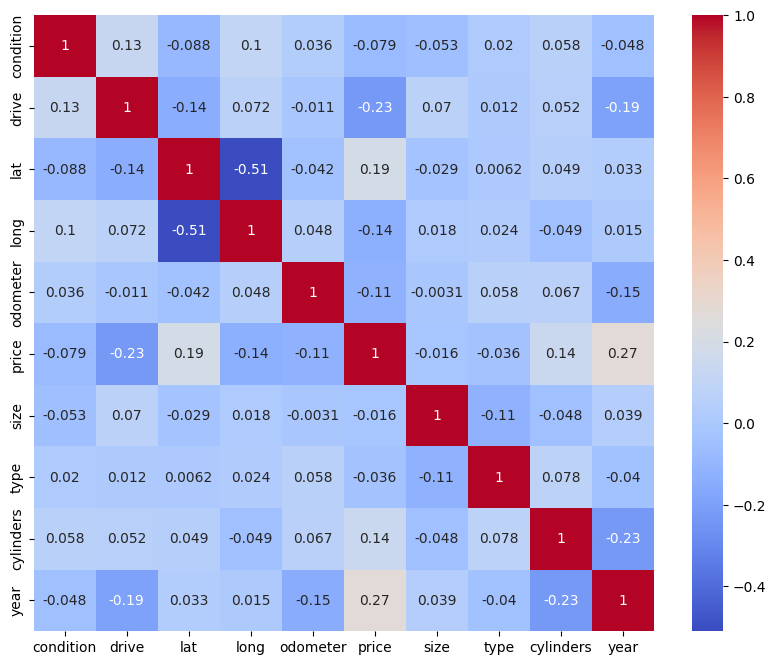

R2 Score (Ridge Regression): 0.20525148902146906


In [16]:
# Generate and show correlation heatmap for only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
ridge = Ridge().fit(X_train, Y_train)
ridge_pred = ridge.predict(X_test)
ridge_r2 = r2_score(Y_test, ridge_pred)
print(f"R2 Score (Ridge Regression): {ridge_r2}")

lasso = Lasso().fit(X_train, Y_train)
lasso_pred = lasso.predict(X_test)
lasso_r2 = r2_score(Y_test, lasso_pred)